# Pupil Measurement Pipeline Model

### Setup / Image Loading

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

xml_folder = '{}\\haarcascades'.format(os.getcwd())
face_cascade = cv2.CascadeClassifier(xml_folder + '\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(xml_folder + '\haarcascade_eye.xml')
eye_cascade_advanced = cv2.CascadeClassifier(xml_folder + '\haarcascade_eye_tree_eyeglasses.xml')

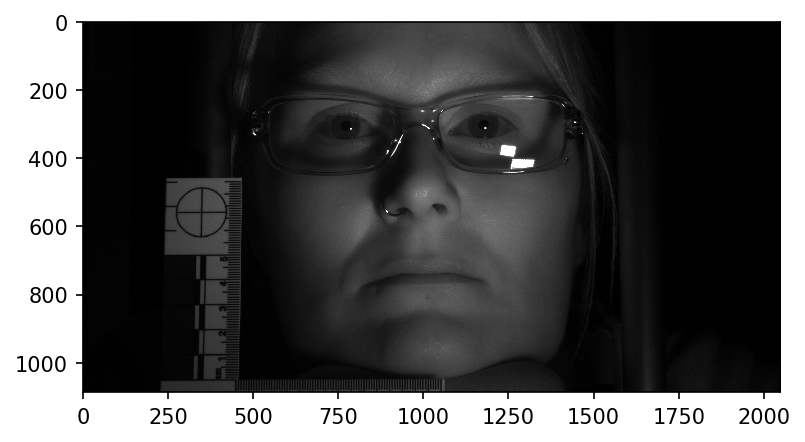

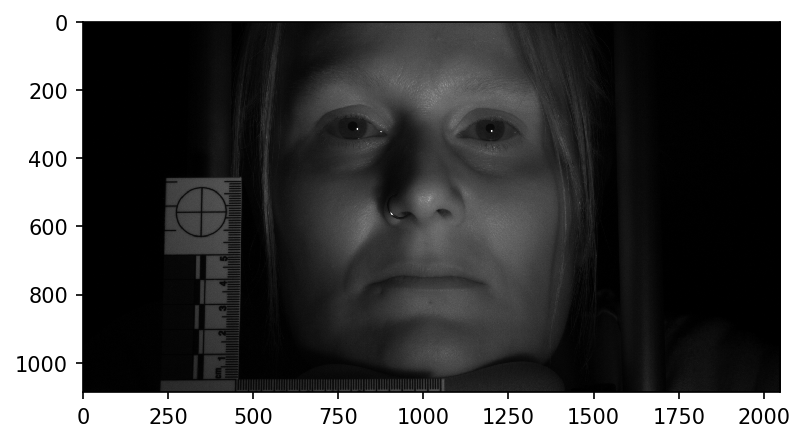

In [2]:
img_list = []
for i in range(2):
    img_list.append(cv2.imread('..\..\..\Research\Photos\Basler_library\{:03d}_{}.bmp'.format(i+1, 1)))
    plt.imshow(img_list[i], cmap='gray')
    plt.show()
    
timing_test = img_list[0]

### Eye Detection

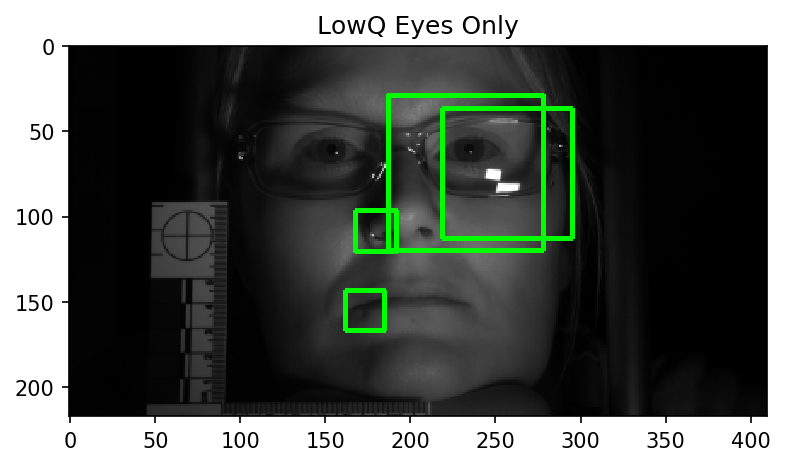

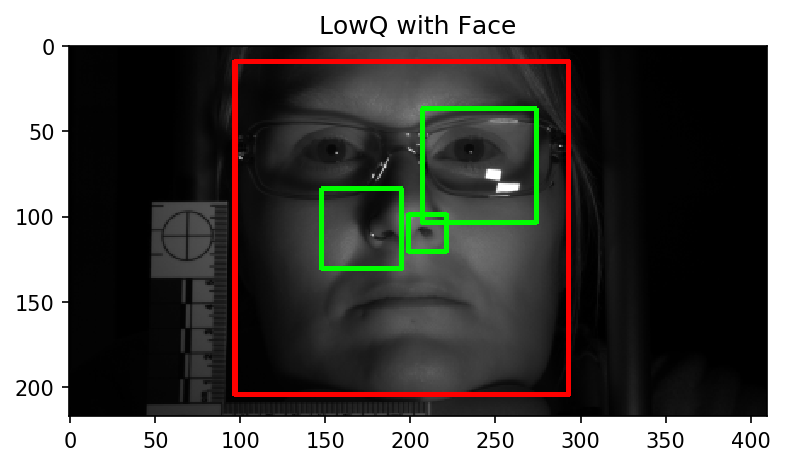

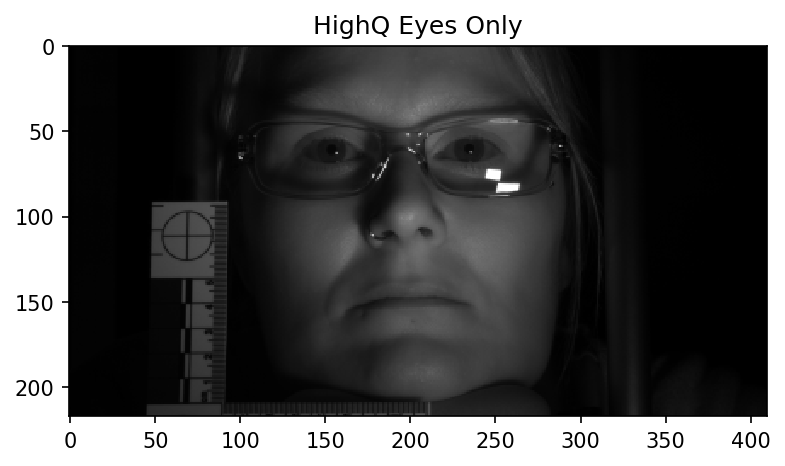

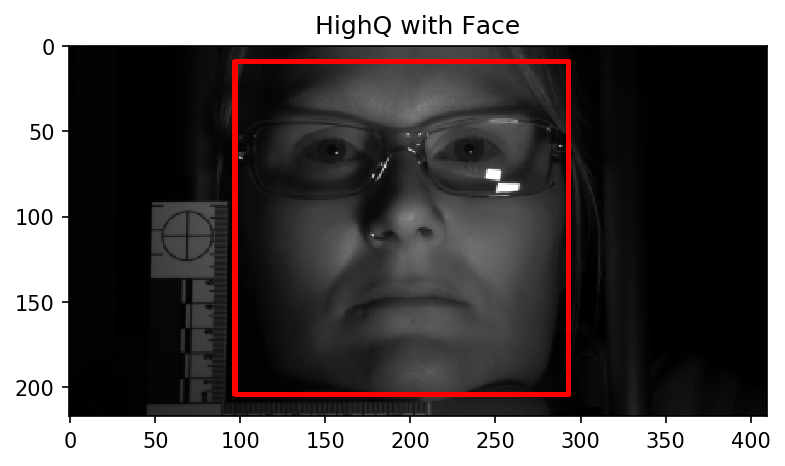

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


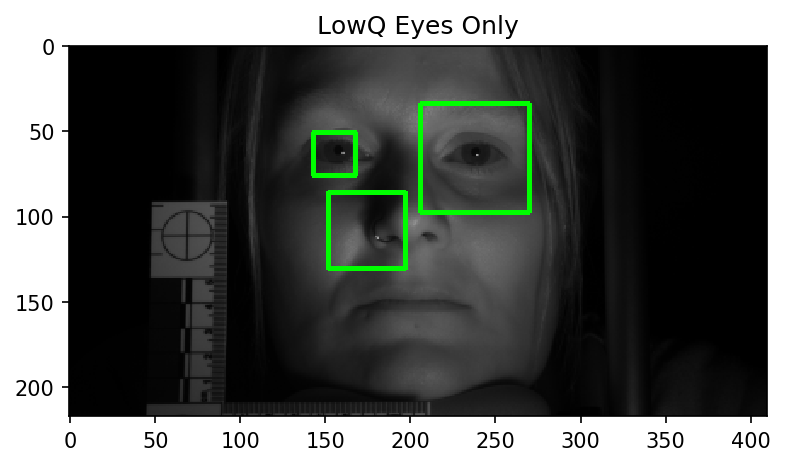

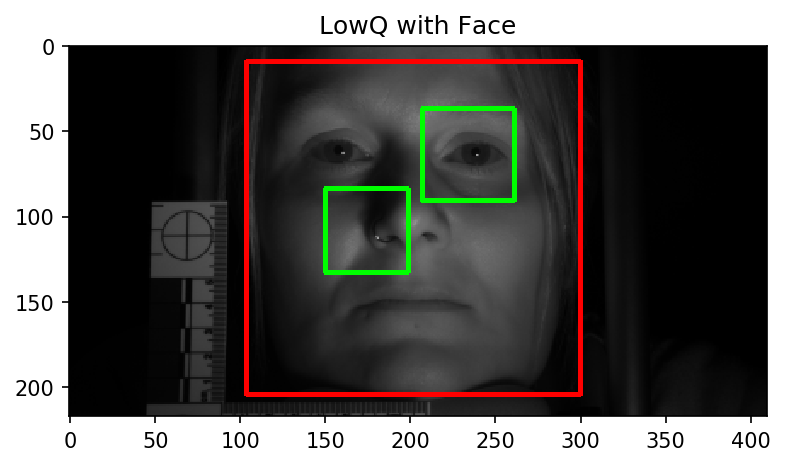

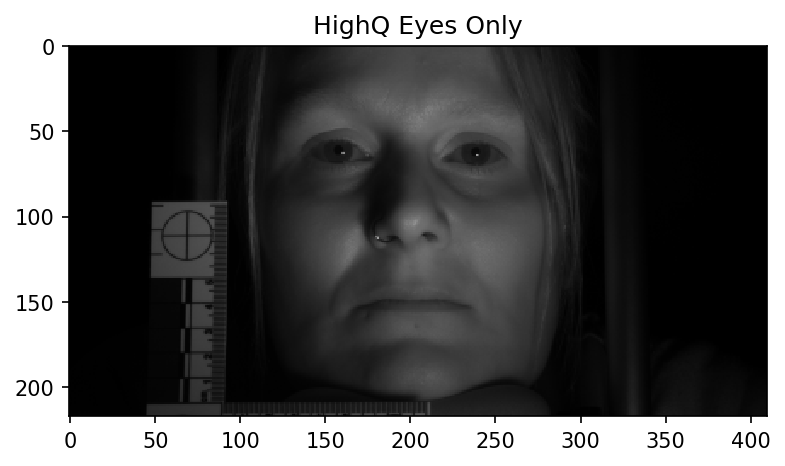

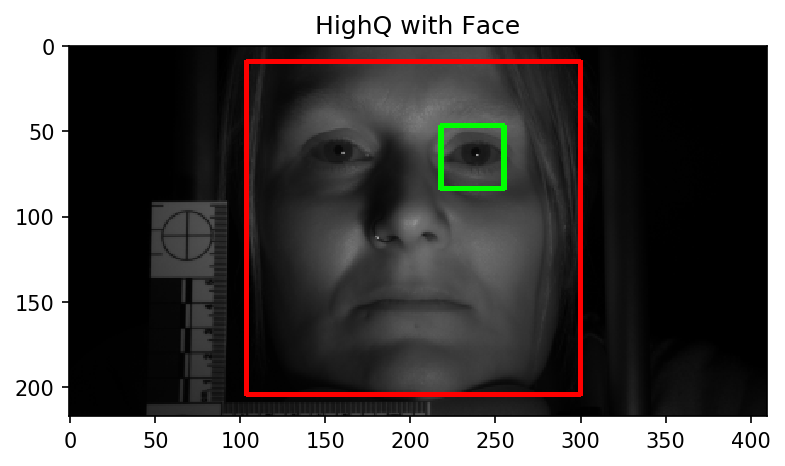

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [3]:
### Test entire list

def show_img (img, title):
    plt.title(title)
    plt.imshow(img_temp, cmap='gray')
    plt.show()

min_h, max_h, max_y = 50, 150, 400
eye_color, face_color, box_width = (0,255,0), (255,0,0), 2
    
for img in img_list:
    resized = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)
    
    img_temp = resized.copy()
    eyes = eye_cascade.detectMultiScale(img_temp)
    for (ex,ey,ew,eh) in [e for e in eyes]:  # if e[3] > min_h and e[3] < max_h and e[1] < max_y
        cv2.rectangle(img_temp, (ex,ey), (ex+ew,ey+eh), eye_color, box_width)
    show_img(img_temp, 'LowQ Eyes Only')
    
    img_temp = resized.copy()
    faces = face_cascade.detectMultiScale(img_temp, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = img_temp[y:y+h, x:x+w]
        cv2.rectangle(img_temp, (x,y), (x+w,y+h), face_color, box_width)

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in [e for e in eyes]:
            cv2.rectangle(roi_gray, (ex,ey), (ex+ew,ey+eh), eye_color, box_width)
    show_img(img_temp, 'LowQ with Face')
    
    img_temp = resized.copy()
    eyes = eye_cascade_advanced.detectMultiScale(img_temp)
    for (ex,ey,ew,eh) in [e for e in eyes]:
        cv2.rectangle(img_temp, (ex,ey), (ex+ew,ey+eh), eye_color, box_width)
    show_img(img_temp, 'HighQ Eyes Only')
    
    img_temp = resized.copy()
    faces = face_cascade.detectMultiScale(img_temp, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = img_temp[y:y+h, x:x+w]
        cv2.rectangle(img_temp, (x,y), (x+w,y+h), face_color, box_width)

        eyes = eye_cascade_advanced.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in [e for e in eyes]:
            cv2.rectangle(roi_gray, (ex,ey), (ex+ew,ey+eh), eye_color, box_width)
    show_img(img_temp, 'HighQ with Face')
    
#     img_temp, gray_temp = img.copy(), cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     circles = cv2.HoughCircles(gray_temp,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
#     circles = np.uint16(np.around(circles))
#     for i in circles[0,:]:
#         cv2.circle(img_temp,(i[0],i[1]),i[2],(0,255,0),2)
#         cv2.circle(img_temp,(i[0],i[1]),2,(0,0,255),3)
#     show_img(img_temp, 'Circle Detection')
    
    for _ in range(3):
        print(''.join(['-' for i in range(120)]))

### Performance Profiling

In [ ]:
### Timing, fast Haar without face detection

%timeit eye_cascade.detectMultiScale(timing_test)

img_temp = timing_test.copy()

eyes = eye_cascade.detectMultiScale(img_temp)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img_temp,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img_temp, cmap='gray')
plt.show()

In [ ]:
### Timing, slow Haar without face detection

%timeit eye_cascade_advanced.detectMultiScale(timing_test)

img_temp = timing_test.copy()

eyes = eye_cascade_advanced.detectMultiScale(img_temp)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img_temp,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(img_temp, cmap='gray')
plt.show()

In [ ]:
### Timing, fast Haar with face detection

%timeit face_cascade.detectMultiScale(timing_test, 1.3, 5)

img_temp = timing_test.copy()

faces = face_cascade.detectMultiScale(img_temp, 1.3, 5)
for (x,y,w,h) in faces:
    roi_gray = img_temp[y:y+h, x:x+w]
    %timeit eye_cascade.detectMultiScale(roi_gray)
    
    cv2.rectangle(img_temp,(x,y),(x+w,y+h),(255,0,0),2)

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
    plt.imshow(img_temp, cmap='gray')

In [ ]:
### Timing, slow Haar with face detection

%timeit face_cascade.detectMultiScale(timing_test, 1.3, 5)

img_temp = timing_test.copy()

faces = face_cascade.detectMultiScale(img_temp, 1.3, 5)
for (x,y,w,h) in faces:
    roi_gray = img_temp[y:y+h, x:x+w]
    %timeit eye_cascade_advanced.detectMultiScale(roi_gray)
    
    cv2.rectangle(img_temp,(x,y),(x+w,y+h),(255,0,0),2)

    eyes = eye_cascade_advanced.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
    plt.imshow(img_temp, cmap='gray')